In [1]:
import os
import sys

import pandas as pd
import plotly.express as px
import numpy as np
import random
import matplotlib.pyplot as plt
from predict_location import predict_future_location

print(os.getcwd())
##
# Set data science variables
ship_trac_path =  "./data/gis_opex_international_shiptrac.csv"
international_raw_ = "./data/gis_opex_international_raw.csv"
ship_trac = pd.read_csv(ship_trac_path, sep=';')
international_raw = pd.read_csv(international_raw_, sep=';')
ship_trac["date"] = pd.to_datetime(ship_trac["date"])
ship_trac.sort_values(by="date", ascending = True, inplace=True)
international_raw["datum_abgang"] = pd.to_datetime(international_raw["datum_abgang"])
international_raw.sort_values(by="datum_abgang", ascending = True, inplace=True)
ship_trac

/home/aparker/Documents/HackZurich/data_science


,date,longitude,latitude,imo_number,course,speed,name,destination,eta
78,2020-12-31 01:07:00,48.28738,12.97589,9467251,256.0,18.3,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
72,2020-12-31 02:24:00,76.97161,6.79023,9780471,287.0,21.8,MUMBAI MAERSK,MYTPP-EGSUZ,06.01.2021 21:00
74,2020-12-31 03:35:00,43.03851,13.25825,9469560,319.0,17.4,MSC TERESA,EGSUZ,02.01.2021 11:00
77,2020-12-31 04:36:00,2.51231,37.15013,9708473,259.0,11.8,YM WREATH,NL RTM,04.01.2021 12:00
79,2020-12-31 04:42:00,40.64130,17.31714,9755933,329.0,19.6,MSC DIANA,SUEZ ANCHORAGE,02.01.2021 20:30
...,...,...,...,...,...,...,...,...,...
169154,2022-12-08 23:59:00,114.11709,22.33337,9647473,147.8,0.0,MSC VENICE,HK HKG,12.08.2022 11:00
169153,2022-12-08 23:59:00,4.05981,51.98498,9629380,111.4,7.7,TOKYO BAY,NLRTM,12.08.2022 21:00
169152,2022-12-08 23:59:00,2.51841,51.82301,9632002,220.1,8.7,APL SINGAPURA,BEANR,13.08.2022 05:30
169149,2022-12-08 23:59:00,25.41992,33.53022,9757216,285.1,12.1,YM WISDOM,NLRTM,24.08.2022 02:00


In [2]:
ship_trac[ship_trac["imo_number"]==9467251]

,date,longitude,latitude,imo_number,course,speed,name,destination,eta
78,2020-12-31 01:07:00,48.28738,12.97589,9467251,256.0,18.3,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
130,2020-12-31 13:49:00,44.46358,12.15867,9467251,293.0,18.1,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
196,2020-12-31 20:44:00,42.82171,13.43471,9467251,308.0,20.3,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
252,2020-12-31 23:47:00,42.33441,14.26733,9467251,335.0,18.6,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
321,2021-01-01 06:39:00,41.29694,16.15548,9467251,331.0,18.5,CSCL VENUS,SUEZ CANAL,03.01.2021 13:00
...,...,...,...,...,...,...,...,...,...
135619,2022-12-04 23:57:00,35.63367,25.50978,9467251,325.8,18.0,CSCL VENUS,EG SZC,13.04.2022 20:00
160567,2022-12-07 06:59:00,9.91149,42.39056,9467251,4.3,17.9,CSCL VENUS,ITGOA,12.07.2022 13:00
160643,2022-12-07 13:59:00,8.80113,44.15310,9467251,336.6,15.5,CSCL VENUS,ITGOA,12.07.2022 13:00
160716,2022-12-07 20:57:00,8.77991,44.41942,9467251,262.3,0.1,CSCL VENUS,ITGOA,12.07.2022 13:00


In [3]:
unique_ship_labels = ship_trac['imo_number']
for imo_nr in unique_ship_labels[0:10]:
    imo_data = ship_trac[ship_trac['imo_number'] == imo_nr]
    fig = px.scatter_geo(imo_data,lat='latitude',lon='longitude')
fig.show()

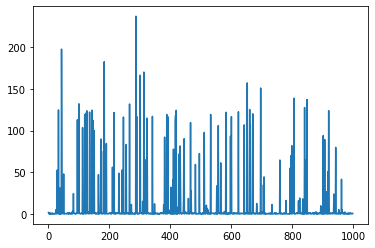

In [4]:
error_list = []
import timedelta
for imo_nr in unique_ship_labels[:1000]:
    imo_data = ship_trac[ship_trac['imo_number'] == imo_nr]
    no_measurements = len(imo_data)
    if no_measurements >3:
        rand = random.randrange(no_measurements-1)
        date, lat, long, speed, course =imo_data.iloc[rand][["date", "latitude", "longitude", "speed", "course"]]
        next_date, next_lat, next_long, next_speed, next_course =imo_data.iloc[rand+1][["date", "latitude", "longitude", "speed", "course"]]
        #print(lat, long)
        #print(next_lat, next_long)
        time_diff = td = timedelta.Timedelta(next_date - date).total.seconds/(60*60)
        pred_lat, pred_long = predict_future_location(lat, long, speed, course, time_diff)
        #print(pred_lat, pred_long)
        error = np.sqrt((next_lat-pred_lat)**2 + (next_long-pred_long)**2)
        error_list.append(error)
plt.plot(error_list)

In [5]:
np.median(error_list)

0.5213287526776734